# Libraries

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

# plot style
plt.style.use("seaborn-v0_8")
# print(plt.style.available)

# the "R4" palette
_colours = ["#000000f0", "#DF536Bf0", "#61D04Ff0", "#2297E6f0",
            "#28E2E5f0", "#CD0BBCf0", "#F5C710f0", "#999999f0"]

_linestyles = ["solid", "dashed", "dashdot", "dotted"]

# A different plotting style for each plotted line
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=_colours, linestyle=_linestyles*2)
plt.rcParams["patch.facecolor"] = _colours[0]

# Python version
import sys
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
body = pd.read_csv("data/nhanes_adult_female_bmx_2020.csv", comment="#")

In [3]:
body.iloc[:6, :]

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
5,62.0,144.7,32.5,34.2,29.8,106.7,84.8


In [4]:
body_columns = np.array(body.columns.tolist())
print(f"before: {body_columns}")
body_columns = np.char.replace(body_columns, "BMX", "")
print(f"after:  {body_columns}")

before: ['BMXWT' 'BMXHT' 'BMXARML' 'BMXLEG' 'BMXARMC' 'BMXHIP' 'BMXWAIST']
after:  ['WT' 'HT' 'ARML' 'LEG' 'ARMC' 'HIP' 'WAIST']


In [5]:
body = np.array(body)

In [6]:
print(f"shape: {body.shape}")
print(f"N. dimensions: {body.ndim}")

shape: (4221, 7)
N. dimensions: 2


In [7]:
print(body[:6,:])

[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]
 [ 62.  144.7  32.5  34.2  29.8 106.7  84.8]]


# Matrix

In [8]:
A = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [9]:
print(f"Size: {A.size}")
print(f"Ravel: {A.ravel()}")
print(f"Shape: {A.shape}")

Size: 12
Ravel: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Shape: (3, 4)


In [10]:
A = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(A)

A.shape = (4, 3)

print("\nnew shape:\n", A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

new shape:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [11]:
A = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(A)

print("\nnew shape:\n", A.reshape((4,3)))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

new shape:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


# Visualizing multidimensional data

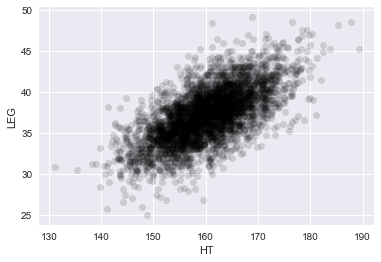

In [12]:
plt.plot(body[:, 1], body[:, 3], "o", c="#00000022")
plt.xlabel(body_columns[1])
plt.ylabel(body_columns[3])
plt.show()

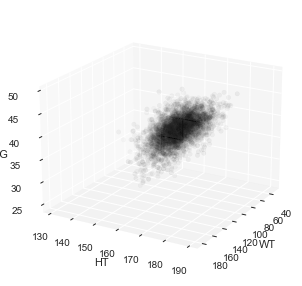

In [13]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection="3d", facecolor="#ffffff00")
ax.scatter(body[:, 1], body[:, 3], body[:, 0], color="#00000011")
ax.view_init(elev=20, azim=30, vertical_axis="y")
ax.set_xlabel(body_columns[1])
ax.set_ylabel(body_columns[3])
ax.set_zlabel(body_columns[0])
plt.show()

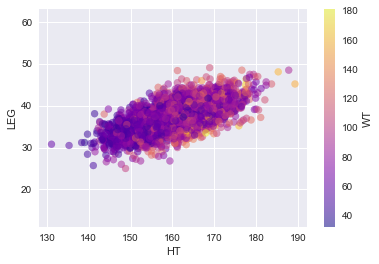

In [14]:
v1 = 1
v2 = 3
v3 = 0

plt.scatter(body[:, v1], body[:, v2], c=body[:, v3], cmap="plasma", alpha=0.5)
plt.xlabel(body_columns[v1])
plt.ylabel(body_columns[v2])
plt.axis("equal")
cbar = plt.colorbar()
cbar.set_label(body_columns[v3])
plt.show()

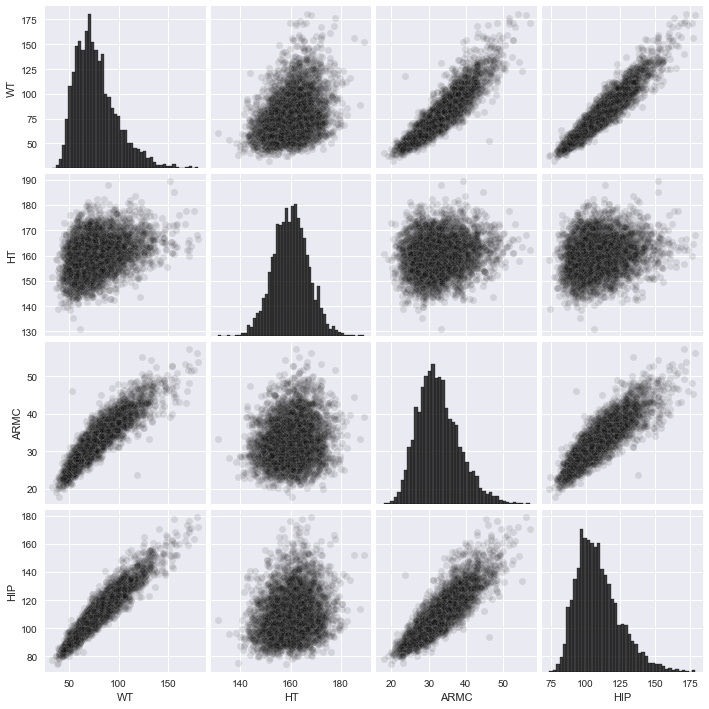

In [15]:
body_df = pd.DataFrame(
    body[:, [0, 1, 4, 5]],
    columns = body_columns[[0, 1, 4, 5]])

sns.pairplot(body_df, plot_kws=dict(alpha=0.1))
plt.show()